Pandas learn tutorial
===
陈同 chentong_biology@163.com
=========

### What is pandas

Pandas是python中用于处理矩阵样数据的功能强大的包，提供了R中的`dataframe`和`vector`的操作，使得我们在使用python时，也可以方便、简单、快捷、高效地进行矩阵数据处理。

具体介绍详见<http://pandas.pydata.org/>。


* A fast and efficient **DataFrame** object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast **HDF5** format;
* Intelligent **data alignment** and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate **messy data into an orderly form**;
* Flexible **reshaping** and **pivoting** of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
* High performance **merging** and **joining** of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
* Highly optimized for performance, with critical code paths written in Cython or C.
* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.


In [197]:
%matplotlib inline

#import plotly
#plotly.offline.init_notebook_mode()

import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob

### Pandas读取文件

#### 获取目标文件

In [27]:
dir_1 = "pandas_data/"
glob(dir_1+'*')

['pandas_data/ENCFF289HGQ.tsv',
 'pandas_data/gencode.v24.ENS2SYN',
 'pandas_data/ENCFF262OBL.tsv',
 'pandas_data/Gene_metadata_primary_wt_whole_cell.tsv',
 'pandas_data/ENCFF673KYR.tsv',
 'pandas_data/ENCFF060LPA.tsv']

#### 查看目标文件内容和格式
Ipython中可以通过在Linux命令前加`!`调用系统命令，更多使用见
http://ipython.org/ipython-doc/3/interactive/reference.html#system-shell-access.

In [10]:
!head -n 4 pandas_data/gencode.v24.ENS2SYN

gene_id	gene_symbol
ENSG00000223972.5	DDX11L1
ENSG00000227232.5	WASH7P
ENSG00000278267.1	MIR6859-1


In [11]:
!head -n 4 pandas_data/ENCFF556YSD.tsv

transcript_id	gene_id	length	effective_length	expected_count	TPM	FPKM
ENST00000373020.4	ENSG00000000003.10	2206	1925.57	997.23	1.71	7.21
ENST00000494424.1	ENSG00000000003.10	820	539.58	24.77	0.15	0.64
ENST00000496771.1	ENSG00000000003.10	1025	744.57	0.00	0.00	0.00


#### 读取两列文件

In [12]:
ens2syn_file = "pandas_data/gencode.v24.ENS2SYN"

In [98]:
# pandas中的计数都是从0开始的
# header=0: 指定第一行包含列的名字
# index_col=0: 指定第一列为行的名字
ens2syn = pd.read_table(ens2syn_file, header=0, index_col=0)

#### 数据表的索引
    * 数值索引和布尔值索引是按行选取
    * 字符串索引是按列选取
    * 行和列是等效的，应用于行的选取函数也可应用于列，反之亦然

##### 按行选取数据

In [14]:
ens2syn[:3]

,gene_symbol
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000278267.1,MIR6859-1


##### 取出索引中包含特定值的行

In [16]:
ens2syn[ens2syn.index=="ENSG00000227232.5"]

,gene_symbol
gene_id,
ENSG00000227232.5,WASH7P


##### 取出某列包含特定值列表的行

In [20]:
ens2syn[ens2syn['gene_symbol'].isin(['DDX11L1','MIR6859-1'])]

,gene_symbol
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000278267.1,MIR6859-1


##### 使用正则表达式选取符合要求的行

In [23]:
# head: 只展示部分数据
ens2syn[ens2syn.index.str.contains(r'ENSG0000022')].head()

,gene_symbol
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000222623.1,RNU6-1100P
ENSG00000228463.9,AP006222.2
ENSG00000224813.3,SEPT14P13


#### 读取多列文件

`gzip`, `bzip`压缩的文件也可以直接读取，但是需要保证文件后缀的正确。
`read_table`默认参数可以自动检测文件的格式，根据文件的后缀 '.gz', '.bz2', '.zip', or 'xz'分别使用 gzip, bz2, zip or xz读取。

In [28]:
tsvL = glob(dir_1+'ENC*.tsv')
tsvL

['pandas_data/ENCFF289HGQ.tsv',
 'pandas_data/ENCFF262OBL.tsv',
 'pandas_data/ENCFF673KYR.tsv',
 'pandas_data/ENCFF060LPA.tsv']

In [30]:
index = 0
tsvFile = tsvL[index]
expr = pd.read_table(tsvFile, header=0, index_col=0)
expr.head(3)

,transcript_id(s),length,effective_length,expected_count,TPM,FPKM
gene_id,,,,,,
ENSG00000000003.14,"ENST00000373020.8,ENST00000494424.1,ENST000004...",2198.69,1939.24,2827.0,1.03,10.84
ENSG00000000005.5,"ENST00000373031.4,ENST00000485971.1",940.50,681.07,0.0,0.00,0.00
ENSG00000000419.12,"ENST00000371582.8,ENST00000371584.8,ENST000003...",1079.84,820.38,1680.0,1.45,15.23


#### 选取多列数据
列的输出顺序与给定的列名字的顺序一致

In [33]:
expr[['FPKM','TPM']].head(3)

,FPKM,TPM
gene_id,,
ENSG00000000003.14,10.84,1.03
ENSG00000000005.5,0.00,0.00
ENSG00000000419.12,15.23,1.45


#### 重命名列名字
从Dataframe中只选取一列时，数据框会被转换成Series，因此需要使用`pd.loc[:,[column_name]]`(虽然内部的方括号内只有一个值，但写法是必须的)索引。

In [37]:
# 因为要把多个文件的同一类型表达值合并到一个文件，我们使用文件名作为列的名字
name = os.path.split(tsvFile)[-1][:-4]
print name
expr_tpm = expr.loc[:,['TPM']] # 取出所有的行和名字为TPM的列
expr_tpm.columns=[name]  
expr_tpm[:3]

ENCFF289HGQ


,ENCFF289HGQ
gene_id,
ENSG00000000003.14,1.03
ENSG00000000005.5,0.00
ENSG00000000419.12,1.45


#### 合并矩阵

##### 定义函数简化文件读取

In [54]:
# 为了读取多个文件，定义一个函数简化操作
def readExpr_1(tsvFileL, typeL=['TPM','FPKM']):
    '''
    tsvFileL: lists of files waiting for reading
    resultD: a dictionary to save data matrix
            {'TPM':[mat1, mat2,...]
             'FPKM':[mat1, mat2, ...]}
    typeL; list of names for columns to be extracted
    '''
    resultD = {}
    for _type in typeL: resultD[_type] = []
    
    for tsvFile in tsvFileL:
        expr = pd.read_table(tsvFile, header=0, index_col=0)
        name = os.path.split(tsvFile)[-1][:-4]  #this options is very arbitary
        for _type in typeL: # add _ to type to avoid override Python inner function `type` 
            expr_type = expr.loc[:,[_type]]
            expr_type.columns = [name]
            resultD[_type].append(expr_type)
    return resultD
#-----------------------------------------------------

In [60]:
exprD = readExpr_1(tsvL)
TPM_mat = exprD['TPM']
FPKM_mat = exprD['FPKM']

##### 使用pd.merge合并矩阵示例

先从刚才读取的矩阵中选出2个测试下pandas中的矩阵合并方法和效果

In [58]:
# 选取第一个矩阵
_idL = ['ENSG00000000003.14', 'ENSG00000000005.5','ENSG00000000419.12','ENSG00000000457.13']
mat1 = TPM_mat[0]
mat1 = mat1[mat1.index.isin(_idL)]
mat1

,ENCFF289HGQ
gene_id,
ENSG00000000003.14,1.03
ENSG00000000005.5,0.00
ENSG00000000419.12,1.45
ENSG00000000457.13,0.24


In [62]:
# 选取第二个矩阵
_idL = ['ENSG00000001561.6','ENSG00000000003.14', 'ENSG00000000419.12','ENSG00000001036.13']
mat2 = TPM_mat[1]
mat2 = mat2[mat2.index.isin(_idL)]
mat2

,ENCFF262OBL
gene_id,
ENSG00000000003.14,17.13
ENSG00000000419.12,18.86
ENSG00000001036.13,10.34
ENSG00000001561.6,2.47


基于索引(index)的合并
    * outer: 合并所有的索引，缺失值填充NA
    * inner：保留共有的索引
    * left：使用第一个矩阵的索引
    * right：使用第二个矩阵的索引

In [64]:
pd.merge(mat1, mat2, left_index=True, right_index=True, how="outer")

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000005.5,0.00,NaN
ENSG00000000419.12,1.45,18.86
ENSG00000000457.13,0.24,NaN
ENSG00000001036.13,NaN,10.34
ENSG00000001561.6,NaN,2.47


In [65]:
pd.merge(mat1, mat2, left_index=True, right_index=True, how="inner")

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000419.12,1.45,18.86


In [66]:
pd.merge(mat1, mat2, left_index=True, right_index=True, how="left")

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000005.5,0.00,NaN
ENSG00000000419.12,1.45,18.86
ENSG00000000457.13,0.24,NaN


##### 使用pd.concat合并矩阵示例 
对于较多的数据表合并操作时，`concat`比`merge`要简单快速很多。

In [67]:
pd.concat([mat1, mat2], axis=1)

,ENCFF289HGQ,ENCFF262OBL
ENSG00000000003.14,1.03,17.13
ENSG00000000005.5,0.00,NaN
ENSG00000000419.12,1.45,18.86
ENSG00000000457.13,0.24,NaN
ENSG00000001036.13,NaN,10.34
ENSG00000001561.6,NaN,2.47


In [70]:
pd.concat([mat1, mat2], axis=1, join="inner")

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000419.12,1.45,18.86


##### 使用pd.join合并矩阵示例

In [86]:
mat3 = mat1.join(mat2, how="outer")
mat3

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000005.5,0.00,NaN
ENSG00000000419.12,1.45,18.86
ENSG00000000457.13,0.24,NaN
ENSG00000001036.13,NaN,10.34
ENSG00000001561.6,NaN,2.47


替换NA值为0

In [88]:
mat3 = mat3.fillna(0)
mat3

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000005.5,0.00,0.00
ENSG00000000419.12,1.45,18.86
ENSG00000000457.13,0.24,0.00
ENSG00000001036.13,0.00,10.34
ENSG00000001561.6,0.00,2.47


去除所有值都为0的行

In [90]:
#Both works well here
#mat3[(mat3>0).any(axis=1)]
mat3.loc[(mat3>0).any(axis=1)]

,ENCFF289HGQ,ENCFF262OBL
gene_id,,
ENSG00000000003.14,1.03,17.13
ENSG00000000419.12,1.45,18.86
ENSG00000000457.13,0.24,0.00
ENSG00000001036.13,0.00,10.34
ENSG00000001561.6,0.00,2.47


##### 测试三种方法使用的内存和速度比较

速度：`concat`>`join`>>`merge`

内存：相当

In [77]:
%timeit test_merge = reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True,how='outer'), TPM_mat)

100 loops, best of 3: 3.36 ms per loop


In [79]:
%timeit test_merge = pd.concat(TPM_mat, axis=1)

1000 loops, best of 3: 1.21 ms per loop


In [80]:
%timeit TPM_mat[0].join(TPM_mat[1:], how="outer")

1000 loops, best of 3: 1.25 ms per loop


In [81]:
%load_ext memory_profiler

In [83]:
%memit test_merge = reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True,how='outer'), TPM_mat)

peak memory: 107.32 MiB, increment: 0.01 MiB


In [82]:
%memit test_merge = pd.concat(TPM_mat, axis=1)

peak memory: 107.30 MiB, increment: 0.10 MiB


In [84]:
%memit TPM_mat[0].join(TPM_mat[1:], how="outer")

peak memory: 107.32 MiB, increment: 0.00 MiB


##### 重写函数完成文件的读写和矩阵的合并

In [85]:
# 读取多个文件，并且合并矩阵，定义一个函数简化操作
def concatExpr(tsvFileL, typeL=['TPM','FPKM']):
    '''
    tsvFileL: lists of files waiting for reading
    resultD: a dictionary to save data matrix
            {'TPM':[mat1, mat2,...]
             'FPKM':[mat1, mat2, ...]}
    typeL; list of names for columns to be extracted
    '''
    resultD = {}
    for _type in typeL: resultD[_type] = []
    
    for tsvFile in tsvFileL:
        expr = pd.read_table(tsvFile, header=0, index_col=0)
        name = os.path.split(tsvFile)[-1][:-4]  #this options is very arbitary
        for _type in typeL: # add _ to type to avoid override Python inner function `type` 
            expr_type = expr.loc[:,[_type]]
            expr_type.columns = [name]
            resultD[_type].append(expr_type)
    #-------------------------------------------
    mergeD = {}
    for _type in typeL:
        mergeM = pd.concat(resultD[_type], axis=1)
        mergeM = mergeM.fillna(0) # Substitute all NA with 0
        mergeM = mergeM.loc[(mergeM>0).any(axis=1)] # Delete aoo zero rows.
        mergeD[_type] = mergeM
    return mergeD
#-----------------------------------------------------

In [91]:
typeL = ['TPM','FPKM']
exprD = concatExpr(tsvL, typeL)
TPM_mat = exprD['TPM']
FPKM_mat = exprD['FPKM']

In [92]:
TPM_mat.head()

,ENCFF289HGQ,ENCFF262OBL,ENCFF673KYR,ENCFF060LPA
gene_id,,,,
ENSG00000000003.14,1.03,17.13,2.42,6.64
ENSG00000000419.12,1.45,18.86,1.80,9.91
ENSG00000000457.13,0.24,2.48,0.38,0.86
ENSG00000000460.16,0.26,5.36,0.16,1.51
ENSG00000000938.12,0.00,0.05,0.00,0.01


#### 矩阵数据提取

只保留表达矩阵中存储的基因的`ID`和`Symbol`对照表

In [99]:
# 回顾下数据格式
ens2syn.head(3)

,gene_symbol
gene_id,
ENSG00000223972.5,DDX11L1
ENSG00000227232.5,WASH7P
ENSG00000278267.1,MIR6859-1


In [100]:
ens2syn.shape

(60725, 1)

In [101]:
ens2syn = ens2syn[ens2syn.index.isin(TPM_mat.index)]

In [102]:
ens2syn.shape

(48, 1)

In [103]:
ens2syn.head(3)

,gene_symbol
gene_id,
ENSG00000001460.17,STPG1
ENSG00000001461.16,NIPAL3
ENSG00000000938.12,FGR


#### 读取META data文件

In [105]:
meta = "pandas_data/meta.tsv"
metaM = pd.read_table(meta, header=0, index_col=0)
# 重名了列的名字
oriColnames = metaM.columns.values
nameD = dict([(i,i.replace(' ','_')) for i in oriColnames])
metaM.rename(columns=nameD, inplace=True)
metaM.head(3)

,File format,Output type,Experiment accession,Assay,Biosample term id,Biosample term name,Biosample type,Biosample life stage,Biosample sex,Biosample organism,...,md5sum,File download URL,Assembly,Platform,Controlled by,File Status,Audit WARNING,Audit INTERNAL_ACTION,Audit NOT_COMPLIANT,Audit ERROR
File accession,,,,,,,,,,,,,,,,,,,,,
ENCFF120PLK,tsv,gene quantifications,ENCSR198TKA,RNA-seq,CL:0000650,mesangial cell,primary cell,"unknown, fetal","unknown, female",Homo sapiens,...,1e9a3db25f5361b2ca454d1df427f430,https://www.encodeproject.org/files/ENCFF120PL...,hg19,NaN,NaN,released,NaN,NaN,NaN,NaN
ENCFF805BVE,tsv,gene quantifications,ENCSR198TKA,RNA-seq,CL:0000650,mesangial cell,primary cell,"unknown, fetal","unknown, female",Homo sapiens,...,ee0e94d6795ed7c2ef69c61b1d29eb02,https://www.encodeproject.org/files/ENCFF805BV...,hg19,NaN,NaN,released,NaN,NaN,NaN,NaN
ENCFF850RHD,tsv,gene quantifications,ENCSR198TKA,RNA-seq,CL:0000650,mesangial cell,primary cell,"unknown, fetal","unknown, female",Homo sapiens,...,22f948135c0935516f19f6b995ccc30c,https://www.encodeproject.org/files/ENCFF850RH...,GRCh38,NaN,NaN,released,NaN,NaN,NaN,NaN


##### 只保留前面提到的4个样品的数据

In [116]:
sampleL = TPM_mat.columns.values
metaM = metaM[metaM.index.isin(sampleL)]
# 同时索引行和列
metaM.ix[:4,:5]

,Biosample term id,Biosample term name,Biosample type,Biosample life stage,Biosample sex
File accession,,,,,
ENCFF673KYR,CL:0000650,mesangial cell,primary cell,"unknown, fetal","unknown, female"
ENCFF262OBL,CL:1001568,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF060LPA,CL:1001568,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF289HGQ,CL:0002558,fibroblast of villous mesenchyme,primary cell,newborn,"male, female"


#####  提取目标列信息

In [115]:
# 假如只提取`Biosample`开头的列
#meta_colL = ['Biosample term id', 'Biosample term name']

# Extract columns matching specific patterns
# Both works well, filter is more simple
#metaM.loc[:,metaM.columns.str.contains(r'^Biosample')]
metaM = metaM.filter(regex=("^Biosample"))
metaM

,Biosample term id,Biosample term name,Biosample type,Biosample life stage,Biosample sex,Biosample organism,Biosample treatments,Biosample subcellular fraction term name,Biosample phase,Biosample synchronization stage,Biosample Age
File accession,,,,,,,,,,,
ENCFF673KYR,CL:0000650,mesangial cell,primary cell,"unknown, fetal","unknown, female",Homo sapiens,NaN,NaN,NaN,NaN,NaN
ENCFF262OBL,CL:1001568,pulmonary artery endothelial cell,primary cell,adult,male,Homo sapiens,NaN,NaN,NaN,NaN,52 year
ENCFF060LPA,CL:1001568,pulmonary artery endothelial cell,primary cell,adult,male,Homo sapiens,NaN,NaN,NaN,NaN,23 year
ENCFF289HGQ,CL:0002558,fibroblast of villous mesenchyme,primary cell,newborn,"male, female",Homo sapiens,NaN,NaN,NaN,NaN,NaN


In [127]:
metaM.fillna('')

,Biosample term id,Biosample term name,Biosample type,Biosample life stage,Biosample sex,Biosample organism,Biosample treatments,Biosample subcellular fraction term name,Biosample phase,Biosample synchronization stage,Biosample Age
File accession,,,,,,,,,,,
ENCFF673KYR,CL:0000650,mesangial cell,primary cell,"unknown, fetal","unknown, female",Homo sapiens,,,,,
ENCFF262OBL,CL:1001568,pulmonary artery endothelial cell,primary cell,adult,male,Homo sapiens,,,,,52 year
ENCFF060LPA,CL:1001568,pulmonary artery endothelial cell,primary cell,adult,male,Homo sapiens,,,,,23 year
ENCFF289HGQ,CL:0002558,fibroblast of villous mesenchyme,primary cell,newborn,"male, female",Homo sapiens,,,,,


### Pandas写入文件

#### 写入文本文件

In [117]:
metaM.to_csv("pandas_data/meta2.tsv", sep="\t")

In [121]:
ens2syn.to_csv("pandas_data/gencode.v24.ENS2SYN", sep="\t")

In [119]:
TPM_mat.to_csv("pandas_data/TPM", sep=b'\t', float_format="%.2f")

#### 写入HDF5文件

HDF5 is a data model, library, and file format for storing and managing data. It supports an unlimited variety of datatypes, and is designed for flexible and efficient I/O and for high volume and complex data. HDF5 is portable and is extensible, allowing applications to evolve in their use of HDF5. The HDF5 Technology suite includes tools and applications for managing, manipulating, viewing, and analyzing data in the HDF5 format. <https://support.hdfgroup.org/HDF5/>

使用优势是把处理好的数据以二进制文件存取，既可以减少文件数目、压缩使用空间，又可以方便多次快速读取，并且可以在不同的程序语言如Python与R中共同使用。

HDF5文件的写入形式上类似于字典操作，其读取也是。

In [122]:
# 写入模式打开一个HDF5文件,使用压缩格式以节省空间
store = pd.HDFStore("pandas_data/ENCODE.hdf5", "w", complib=str("zlib"), complevel=9)

# 写入表达矩阵
store["TPM"] = TPM_mat
store["FPKM"] = FPKM_mat

# 写入注释文件
store['ens2syn'] = ens2syn
store['meta'] = metaM

# 关闭HDF5句柄
store.close()

/MPATHB/soft/anacond/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3035: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['Biosample term id', 'Biosample term name', 'Biosample type', 'Biosample life stage', 'Biosample sex', 'Biosample organism', 'Biosample Age']]

  exec(code_obj, self.user_global_ns, self.user_ns)


当数据中存在混合数据模式时，会出现上面的Warning，对于我们的数据只要把`metaM`中的`NaN`值替换掉就可以。

In [128]:
# 写入模式打开一个HDF5文件,使用压缩格式已节省空间
store = pd.HDFStore("pandas_data/ENCODE.hdf5", "w", complib=str("zlib"), complevel=9)

# 写入表达矩阵
store["TPM"] = TPM_mat
store["FPKM"] = FPKM_mat

# 写入注释文件
store['ens2syn'] = ens2syn
store['meta'] = metaM.fillna('')

# 关闭HDF5句柄
store.close()

#### 读取HDF5文件

In [129]:
store = pd.HDFStore("pandas_data/ENCODE.hdf5")

In [130]:
# 列出HDF5文件的索引名字
store.keys()

['/FPKM', '/TPM', '/ens2syn', '/meta']

In [138]:
TPM_mat = store['TPM']
TPM_mat.head(3)

,ENCFF289HGQ,ENCFF262OBL,ENCFF673KYR,ENCFF060LPA
gene_id,,,,
ENSG00000000003.14,1.03,17.13,2.42,6.64
ENSG00000000419.12,1.45,18.86,1.80,9.91
ENSG00000000457.13,0.24,2.48,0.38,0.86


In [140]:
ens2syn = store['ens2syn']
meta = store['meta']

In [141]:
store.close()

### PANDAS矩阵的小应用

利用上面的矩阵操作，选取这两个基因相关的信息并绘制表达谱

In [152]:
targetL = ['KRIT1','AK2']

Gene_symbol转换为Gene_id

In [153]:
ensID = ens2syn[ens2syn["gene_symbol"].isin(targetL)]
ensID

,gene_symbol
gene_id,
ENSG00000004455.16,AK2
ENSG00000001631.14,KRIT1


提取目标基因的表达

In [154]:
targetExpr = TPM_mat[TPM_mat.index.isin(ensID.index)]
targetExpr

,ENCFF289HGQ,ENCFF262OBL,ENCFF673KYR,ENCFF060LPA
gene_id,,,,
ENSG00000001631.14,1.15,13.36,1.37,6.21
ENSG00000004455.16,2.31,37.62,8.95,15.57


重命名矩阵的索引

In [156]:
ensID_dict = ensID.to_dict()
ensID_dict

{'gene_symbol': {'ENSG00000001631.14': 'KRIT1', 'ENSG00000004455.16': 'AK2'}}

In [157]:
targetExpr = targetExpr.rename(index=ensID_dict['gene_symbol'])
targetExpr

,ENCFF289HGQ,ENCFF262OBL,ENCFF673KYR,ENCFF060LPA
gene_id,,,,
KRIT1,1.15,13.36,1.37,6.21
AK2,2.31,37.62,8.95,15.57


转置矩阵以增加META信息

In [158]:
targetExpr_t = targetExpr.T
targetExpr_t

gene_id,KRIT1,AK2
ENCFF289HGQ,1.15,2.31
ENCFF262OBL,13.36,37.62
ENCFF673KYR,1.37,8.95
ENCFF060LPA,6.21,15.57


从meta矩阵中提取4列信息

In [159]:
meta_type = ["Biosample term name","Biosample type", "Biosample life stage", "Biosample sex"]

In [160]:
meta = meta[meta_type]
meta

,Biosample term name,Biosample type,Biosample life stage,Biosample sex
File accession,,,,
ENCFF673KYR,mesangial cell,primary cell,"unknown, fetal","unknown, female"
ENCFF262OBL,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF060LPA,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF289HGQ,fibroblast of villous mesenchyme,primary cell,newborn,"male, female"


修改下矩阵信息，去除`unknow,`字符串（只是为了展示方便）

In [165]:
meta.loc['ENCFF673KYR',"Biosample life stage"] = "fetal"
# Much faster
meta = meta.set_value('ENCFF673KYR','Biosample sex','female')
meta = meta.set_value('ENCFF289HGQ','Biosample sex','female')
meta

,Biosample term name,Biosample type,Biosample life stage,Biosample sex
File accession,,,,
ENCFF673KYR,mesangial cell,primary cell,fetal,female
ENCFF262OBL,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF060LPA,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF289HGQ,fibroblast of villous mesenchyme,primary cell,newborn,female


In [166]:
target_expr_meta = targetExpr_t.join(meta, how="left")
target_expr_meta

gene_id,KRIT1,AK2,Biosample term name,Biosample type,Biosample life stage,Biosample sex
ENCFF289HGQ,1.15,2.31,fibroblast of villous mesenchyme,primary cell,newborn,female
ENCFF262OBL,13.36,37.62,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF673KYR,1.37,8.95,mesangial cell,primary cell,fetal,female
ENCFF060LPA,6.21,15.57,pulmonary artery endothelial cell,primary cell,adult,male


重名了列名字(替换掉名字中的空格)

In [177]:
oriColnames = target_expr_meta.columns.values
nameD = dict([(i,i.replace(' ','_')) for i in oriColnames])
target_expr_meta.rename(columns=nameD, inplace=True)
target_expr_meta

gene_id,KRIT1,AK2,Biosample_term_name,Biosample_type,Biosample_life_stage,Biosample_sex
ENCFF289HGQ,1.15,2.31,fibroblast of villous mesenchyme,primary cell,newborn,female
ENCFF262OBL,13.36,37.62,pulmonary artery endothelial cell,primary cell,adult,male
ENCFF673KYR,1.37,8.95,mesangial cell,primary cell,fetal,female
ENCFF060LPA,6.21,15.57,pulmonary artery endothelial cell,primary cell,adult,male


绘制散点图

/MPATHB/soft/anacond/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



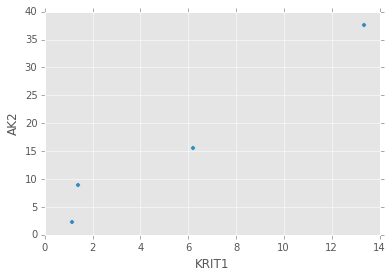

In [169]:
target_expr_meta.plot.scatter(x='KRIT1', y='AK2')

绘制箱线图

/MPATHB/soft/anacond/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning:


The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.



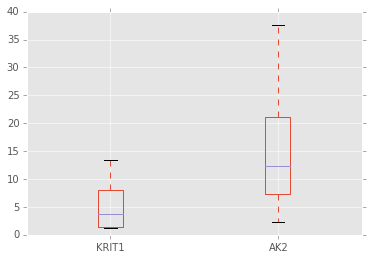

In [173]:
a = target_expr_meta.boxplot(["KRIT1", "AK2"])

使用Plotly绘制交互图

In [196]:
fig = {
    'data': [
        {
            'x': target_expr_meta.KRIT1,
            'y': target_expr_meta.AK2,
            'text': target_expr_meta.Biosample_term_name,
            'mode': 'markers+texts',
            'name': 'Legend name',
            'marker': {
                'symbol':"circle",
                "opacity": "0.9"
            }
        },
        {
            'x': [0,40],
            'y': [0,40],
            'text': "Diagonal",
            'mode': 'lines',
            'name': 'Diagonal line',
            'showlegend': False,
            'line': {
                'color': ('rgb(192,192,192)')
            }
        }
    ],
    'layout': {
        'xaxis': {'title':'KRIT1 expression value','range':[0,40]},
        'yaxis': {'title':'AK2 expression value','range':[0,40]},
        'height':500,
        'width':600,
        'showlegend': True,
         "legend": {
            "x": 0.6,
            "y": 1
        }
    }
}
plotly.offline.iplot(fig)

In [195]:
fig = {
    'data': [
        {
            'x': target_expr_meta[target_expr_meta['Biosample_sex']==atype].KRIT1,
            'y': target_expr_meta[target_expr_meta['Biosample_sex']==atype].AK2,
            'text': target_expr_meta[target_expr_meta['Biosample_sex']==atype].Biosample_term_name,
            'mode': 'markers+texts',
            'name': _type,
            'marker': {
                'symbol':"circle",
                "opacity": "0.9"
            }
        } for atype in ['female','male']
    ],
    'layout': {
        'xaxis': {'title':'KRIT1 expression value','range':[0,40]},
        'yaxis': {'title':'AK2 expression value','range':[0,40]},
        'height':500,
        'width':600,
        'showlegend': True,
         "legend": {
            "x": 0.6,
            "y": 1
        }
    }
}
plotly.offline.iplot(fig)

### 使用R读取HDF5文件

### Pandas矩阵生成

In [135]:
np.random.seed(1)
df = pd.DataFrame({"first": np.random.rand(100),
                   "second": np.random.rand(100),
                   "class": np.random.randint(0, 2, (100,))},
                   index=range(100))
df.head()

,class,first,second
0,0,0.417022,0.326645
1,0,0.720324,0.527058
2,1,0.000114,0.885942
3,1,0.302333,0.357270
4,1,0.146756,0.908535
